# Classification

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get data

In [2]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
!wget $data_url

--2025-10-15 17:48:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.06s   

2025-10-15 17:48:33 (1.23 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



### Data preparation

In [3]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
categorical = ['lead_source', 'industry', 'employment_status', 'location',]
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score',]

In [7]:
df[categorical].isnull().sum()

lead_source          128
industry             134
employment_status    100
location              63
dtype: int64

In [10]:
df[categorical] = df[categorical].fillna('NA')

In [14]:
df.annual_income = df.annual_income.fillna(0.0)

In [15]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Split the data

In [33]:
from sklearn.model_selection import train_test_split
from IPython.display import display

In [35]:
df_full = df.copy()
y_full = df_full.converted.values
del df_full['converted']
display(df_full.head())
print(df_full.shape)
display(y_full)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94
1,social_media,retail,1,46992.0,employed,south_america,1,0.80
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87
4,referral,education,3,85012.0,self_employed,europe,3,0.62


(1462, 8)


array([1, 0, 1, ..., 1, 1, 1], shape=(1462,))

In [38]:
df_full_train, df_test, y_full_train, y_test = train_test_split(df_full, y_full, test_size=0.2, random_state=42)
print(df_full_train.shape, df_test.shape, len(y_full_train), len(y_test))

(1169, 8) (293, 8) 1169 293


In [39]:
df_train, df_val, y_train, y_val = train_test_split(df_full_train, y_full_train, test_size=0.25, random_state=42)
print(df_train.shape, df_val.shape, df_test.shape, len(y_train), len(y_val), len(y_test))

(876, 8) (293, 8) (293, 8) 876 293 293


# Answers on questions

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- ---
-  **`retail`**
-  ---

In [20]:
df.industry.value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

**Answer**: retail

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- ---
- **`annual_income` and `interaction_count`**
- ---

Only consider the pairs above when answering this question.

In [25]:
corr_matrix = df[numerical].corr()
corr_matrix

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


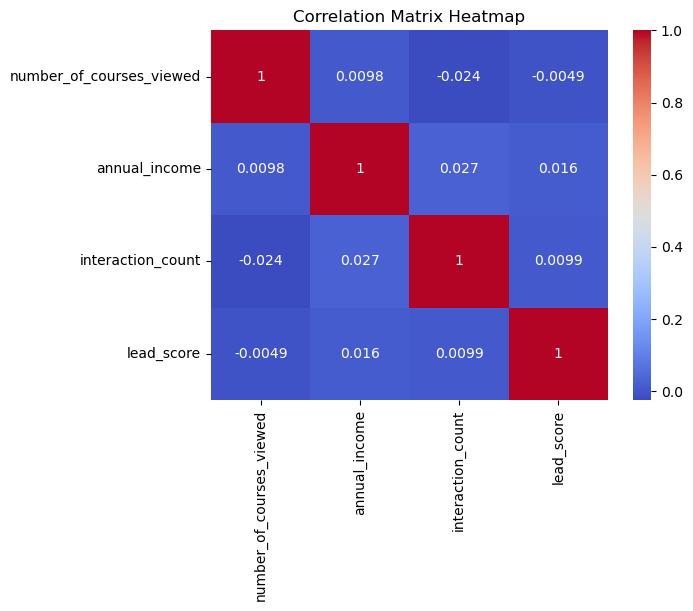

In [26]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

**Answer**: `annual_income` and `interaction_count`

### Question 3

- Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- ---
- **`lead_source`**
- ---
- `employment_status`

In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
def mi_score(series):
    return mutual_info_score(y_train, series)

In [45]:
mi = df_train[categorical].apply(mi_score).round(2)
mi.sort_values(ascending=False)

lead_source          0.04
industry             0.01
employment_status    0.01
location             0.00
dtype: float64

**Answer**: lead_source

### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- ---
- **0.74**
- ---
- 0.84
- 0.94

In [53]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [73]:
dicts_train = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [74]:
dicts_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)
X_val[0]

array([5.222e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 7.000e-02, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       3.000e+00])

In [75]:
model_train = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_train.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [76]:
model_train.intercept_[0], model_train.coef_[0].round(3)

(np.float64(-0.06914728027832417),
 array([-0.   , -0.015,  0.034,  0.003,  0.012, -0.103, -0.025,  0.049,
        -0.02 , -0.013, -0.003, -0.009, -0.032, -0.016,  0.311,  0.051,
         0.02 , -0.012, -0.012, -0.115,  0.08 , -0.03 ,  0.004, -0.011,
        -0.011, -0.006,  0.008,  0.006, -0.033, -0.025,  0.454]))

In [77]:
y_pred = model_train.predict(X_val)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0])

In [78]:
(y_val == y_pred).mean().round(4)

np.float64(0.6997)

In [79]:
y_pred = model_train.predict_proba(X_val)[:, 1]
y_pred[:5]

array([0.61192163, 0.79982617, 0.53021343, 0.47131479, 0.57066131])

In [80]:
converted_decision = (y_pred >= 0.5)
converted_decision[:5]

array([ True,  True,  True, False,  True])

In [81]:
(y_val.astype('int') == converted_decision).mean().round(4)

np.float64(0.6997)

**Answer**: 0.74 ?

### Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- ---
- **`'industry'`**
- ---
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.

In [82]:
def train_and_validate_model(features):
    # feature matrix for train set
    dicts_train = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts_train)
    # feature matrix for validation set
    dicts_val = df_val[features].to_dict(orient='records')
    X_val = dv.transform(dicts_val)
    # train model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    # validate
    y_pred = model.predict(X_val)
    return (y_val.astype('int') == y_pred).mean()

In [87]:
all_features = categorical + numerical
accuracies = {}
for absent_feature in ['none'] + all_features:
    features = set(all_features.copy())
    features.discard(absent_feature)
    features = list(features)
    print(absent_feature, features)
    accuracy = train_and_validate_model(features)
    accuracies[absent_feature] = accuracy
print(accuracies)

none ['lead_score', 'annual_income', 'number_of_courses_viewed', 'industry', 'interaction_count', 'location', 'employment_status', 'lead_source']
lead_source ['lead_score', 'annual_income', 'number_of_courses_viewed', 'industry', 'interaction_count', 'location', 'employment_status']
industry ['lead_score', 'annual_income', 'number_of_courses_viewed', 'interaction_count', 'location', 'employment_status', 'lead_source']
employment_status ['lead_score', 'annual_income', 'number_of_courses_viewed', 'industry', 'interaction_count', 'location', 'lead_source']
location ['lead_score', 'annual_income', 'number_of_courses_viewed', 'industry', 'interaction_count', 'employment_status', 'lead_source']
number_of_courses_viewed ['lead_score', 'annual_income', 'industry', 'interaction_count', 'location', 'employment_status', 'lead_source']
annual_income ['lead_score', 'number_of_courses_viewed', 'industry', 'interaction_count', 'location', 'employment_status', 'lead_source']
interaction_count ['lead_s

In [94]:
df_acc = pd.DataFrame()
acc_items = accuracies.items()
df_acc['absent_feature'] = list(map(lambda x: x[0], acc_items))
df_acc['acc'] = list(map(lambda x: x[1], acc_items))
df_acc

,absent_feature,acc
0,none,0.699659
1,lead_source,0.703072
2,industry,0.699659
3,employment_status,0.696246
4,location,0.709898
5,number_of_courses_viewed,0.556314
6,annual_income,0.853242
7,interaction_count,0.556314
8,lead_score,0.706485


In [104]:
base_acc = df_acc[df_acc.absent_feature == 'none'].acc.values[0]
df_acc['diff'] = base_acc - df_acc['acc']
df_acc['abs_diff'] = df_acc['diff'].abs()
df_acc.sort_values('abs_diff')

,absent_feature,acc,diff,abs_diff
0,none,0.699659,0.000000,0.000000
2,industry,0.699659,0.000000,0.000000
3,employment_status,0.696246,0.003413,0.003413
1,lead_source,0.703072,-0.003413,0.003413
8,lead_score,0.706485,-0.006826,0.006826
4,location,0.709898,-0.010239,0.010239
7,interaction_count,0.556314,0.143345,0.143345
5,number_of_courses_viewed,0.556314,0.143345,0.143345
6,annual_income,0.853242,-0.153584,0.153584


**Answer**: industry

### Question 6

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- ---
- 0.01
- ---
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [126]:
Cs = [0.01, 0.1, 1, 10, 100, 1000, 10000]
accs = {}
# feature matrix for train set
features = categorical + numerical
dicts_train = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
# feature matrix for validation set
dicts_val = df_val[features].to_dict(orient='records')
X_val = dv.transform(dicts_val)
for c in Cs:
    # train model
    model = LogisticRegression(solver='liblinear', C=c, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    # validate
    y_pred = model.predict(X_val)
    acc = (y_val.astype('int') == y_pred).mean().round(4)
    accs[c] = acc

In [127]:
accs

{0.01: np.float64(0.6997),
 0.1: np.float64(0.6997),
 1: np.float64(0.6997),
 10: np.float64(0.6997),
 100: np.float64(0.6997),
 1000: np.float64(0.6997),
 10000: np.float64(0.6997)}

**Answer**: 0.01